In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("/home/ashiya/Downloads/train_DaEJRFg.csv")

In [3]:
test=pd.read_csv("/home/ashiya/Downloads/test_TQDFDgg.csv")

In [4]:
data.head()

,victim_id,incident_time,incident_date,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality
0,VIC20120001987267,22:23:19,07-11-2012,Subhash Nagar,Raipur,Multiple Vehicular Incident,13,12,CUR,HIW,FOR,0
1,VIC20110002147887,20:23:09,02-11-2011,Coro Nation,Raipur,2 Wheeler accidents,1,5,CUR,HIW,AGL,0
2,VIC20090001391483,20:37:15,25-07-2009,Kewal Vihar,Raipur,"Non motorised vehicle accidents(Bullock cart,B...",2,2,INT,LOC,HOSP,0
3,VIC20120000900722,15:20:22,19-05-2012,I S B T,Raipur,2 Wheeler accidents,8,4,CUR,HIW,HIL,0
4,VIC20100001241285,16:22:17,12-06-2010,Sahaspur Ambu,Sahaspur,2 Wheeler accidents,1,26,CUR,HIW,AGL,0


In [5]:
data.shape

(11777, 12)

In [6]:
data.dtypes

victim_id                     object
incident_time                 object
incident_date                 object
incident_location             object
incident_tehsil               object
cause_of_emergency            object
base_to_scene_distance         int64
scene_to_hospital_distance     int64
roadway_feature               object
road_type                     object
surrounding_area              object
criticality                    int64
dtype: object

In [7]:
data.isnull().any()

victim_id                     False
incident_time                 False
incident_date                 False
incident_location              True
incident_tehsil               False
cause_of_emergency            False
base_to_scene_distance        False
scene_to_hospital_distance    False
roadway_feature               False
road_type                     False
surrounding_area              False
criticality                   False
dtype: bool

In [8]:
data.isnull().sum()

victim_id                       0
incident_time                   0
incident_date                   0
incident_location             307
incident_tehsil                 0
cause_of_emergency              0
base_to_scene_distance          0
scene_to_hospital_distance      0
roadway_feature                 0
road_type                       0
surrounding_area                0
criticality                     0
dtype: int64

In [9]:
categorical_variables=data.dtypes[data.dtypes=="object"].index.values

In [10]:
data[categorical_variables].apply(lambda x:len(x.unique()))

victim_id             11777
incident_time         10752
incident_date          2107
incident_location      5522
incident_tehsil           7
cause_of_emergency       14
roadway_feature           5
road_type                 2
surrounding_area          6
dtype: int64

In [11]:
print (data.groupby('criticality').size())

criticality
0    11255
1      522
dtype: int64


In [12]:
print (data.groupby('cause_of_emergency').size())

cause_of_emergency
2 Wheeler accidents                                                         7127
Auto (3 Wheeler accidents)                                                   367
Extrication>20mts                                                             14
MCI                                                                          168
MVC - Pedestrian (Run Over/Hit & Run)                                       1198
MVC-Fixed object (Divider)                                                   147
MVC-MV                                                                        43
MVC-Non traffic inside a parked vehicle/Skidding                              17
MVC-Thrown off from Vehicle                                                  117
Multiple Vehicular Incident                                                 1196
Non motorised vehicle accidents(Bullock cart,Bicycle,Rickshaw,Push cart)      97
Railroad Train/Other Object                                                  138
Vehicle -

In [13]:
print (data.groupby('incident_tehsil').size())

incident_tehsil
Chakrata       199
Dehradun       315
Doiwala       3185
Kalsi           77
Raipur        4794
Sahaspur      2320
Vikasnagar     887
dtype: int64


In [14]:
data.tail()

,victim_id,incident_time,incident_date,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality
11772,VIC20120001118366,23:15:02,13-06-2012,Sanjay Colony--Patel Nagar,Raipur,Multiple Vehicular Incident,4,3,CUR,HIW,HIL,0
11773,VIC20110000320257,00:15:02,03-03-2011,Shartradhar Crosing,Raipur,2 Wheeler accidents,1,2,CUR,HIW,AGL,0
11774,VIC20090001341524,20:52:35,18-07-2009,Ramsawala,Sahaspur,2 Wheeler accidents,25,22,INT,HIW,HOSP,0
11775,VIC20140000744614,06:51:15,23-06-2014,Majri Grant,Doiwala,Multiple Vehicular Incident,8,8,UNK,LOC,AGL,1
11776,VIC20100000952321,16:51:39,09-05-2010,Shimla Chowk,Raipur,Vehicle role over/Skid,8,3,INT,HIW,MAR,0


In [15]:
del data["incident_location"]
del data["victim_id"]

In [16]:
data.head()#incident_time_category' 'day_of_week' 1 2] not in index"


,incident_time,incident_date,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality
0,22:23:19,07-11-2012,Raipur,Multiple Vehicular Incident,13,12,CUR,HIW,FOR,0
1,20:23:09,02-11-2011,Raipur,2 Wheeler accidents,1,5,CUR,HIW,AGL,0
2,20:37:15,25-07-2009,Raipur,"Non motorised vehicle accidents(Bullock cart,B...",2,2,INT,LOC,HOSP,0
3,15:20:22,19-05-2012,Raipur,2 Wheeler accidents,8,4,CUR,HIW,HIL,0
4,16:22:17,12-06-2010,Sahaspur,2 Wheeler accidents,1,26,CUR,HIW,AGL,0


In [17]:
A=data.incident_time.str.split(':', expand=True)

In [18]:
del A[1]
del A[2]

In [19]:
A.head()

,0
0,22
1,20
2,20
3,15
4,16


In [20]:
A.rename(columns={0:'incident_time_category'}, inplace=True)

In [21]:
A.head()

,incident_time_category
0,22
1,20
2,20
3,15
4,16


In [22]:
data1=pd.concat([data,A], axis=1)

In [23]:
data1.tail()

,incident_time,incident_date,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality,incident_time_category
11772,23:15:02,13-06-2012,Raipur,Multiple Vehicular Incident,4,3,CUR,HIW,HIL,0,23
11773,00:15:02,03-03-2011,Raipur,2 Wheeler accidents,1,2,CUR,HIW,AGL,0,00
11774,20:52:35,18-07-2009,Sahaspur,2 Wheeler accidents,25,22,INT,HIW,HOSP,0,20
11775,06:51:15,23-06-2014,Doiwala,Multiple Vehicular Incident,8,8,UNK,LOC,AGL,1,06
11776,16:51:39,09-05-2010,Raipur,Vehicle role over/Skid,8,3,INT,HIW,MAR,0,16


In [24]:
itemsB=["00","01","02","03"]
for x in itemsB:
    data1.loc[data1["incident_time_category"]==x,'incident_time_category']="0"
itemsB=["04","05","06","07"]
for x in itemsB:
    data1.loc[data1["incident_time_category"]==x,'incident_time_category']="1"
itemsB=["08","09","10","11"]
for x in itemsB:
    data1.loc[data1["incident_time_category"]==x,'incident_time_category']="2"
itemsB=["12","13","14","15"]
for x in itemsB:
    data1.loc[data1["incident_time_category"]==x,'incident_time_category']="3"
itemsB=["16","17","18","19"]
for x in itemsB:
    data1.loc[data1["incident_time_category"]==x,'incident_time_category']="4"
itemsB=["20","21","22","23"]
for x in itemsB:
    data1.loc[data1["incident_time_category"]==x,'incident_time_category']="5"

In [25]:
data1.head()

,incident_time,incident_date,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality,incident_time_category
0,22:23:19,07-11-2012,Raipur,Multiple Vehicular Incident,13,12,CUR,HIW,FOR,0,5
1,20:23:09,02-11-2011,Raipur,2 Wheeler accidents,1,5,CUR,HIW,AGL,0,5
2,20:37:15,25-07-2009,Raipur,"Non motorised vehicle accidents(Bullock cart,B...",2,2,INT,LOC,HOSP,0,5
3,15:20:22,19-05-2012,Raipur,2 Wheeler accidents,8,4,CUR,HIW,HIL,0,3
4,16:22:17,12-06-2010,Sahaspur,2 Wheeler accidents,1,26,CUR,HIW,AGL,0,4


In [26]:
data1['incident_date1'] = pd.to_datetime(data1['incident_date'])

In [27]:
data1.head()

,incident_time,incident_date,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality,incident_time_category,incident_date1
0,22:23:19,07-11-2012,Raipur,Multiple Vehicular Incident,13,12,CUR,HIW,FOR,0,5,2012-07-11
1,20:23:09,02-11-2011,Raipur,2 Wheeler accidents,1,5,CUR,HIW,AGL,0,5,2011-02-11
2,20:37:15,25-07-2009,Raipur,"Non motorised vehicle accidents(Bullock cart,B...",2,2,INT,LOC,HOSP,0,5,2009-07-25
3,15:20:22,19-05-2012,Raipur,2 Wheeler accidents,8,4,CUR,HIW,HIL,0,3,2012-05-19
4,16:22:17,12-06-2010,Sahaspur,2 Wheeler accidents,1,26,CUR,HIW,AGL,0,4,2010-12-06


In [28]:
data1['day_of_week'] = data1['incident_date1'].dt.weekday_name


In [29]:
data1.head()

,incident_time,incident_date,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality,incident_time_category,incident_date1,day_of_week
0,22:23:19,07-11-2012,Raipur,Multiple Vehicular Incident,13,12,CUR,HIW,FOR,0,5,2012-07-11,Wednesday
1,20:23:09,02-11-2011,Raipur,2 Wheeler accidents,1,5,CUR,HIW,AGL,0,5,2011-02-11,Friday
2,20:37:15,25-07-2009,Raipur,"Non motorised vehicle accidents(Bullock cart,B...",2,2,INT,LOC,HOSP,0,5,2009-07-25,Saturday
3,15:20:22,19-05-2012,Raipur,2 Wheeler accidents,8,4,CUR,HIW,HIL,0,3,2012-05-19,Saturday
4,16:22:17,12-06-2010,Sahaspur,2 Wheeler accidents,1,26,CUR,HIW,AGL,0,4,2010-12-06,Monday


In [30]:
B=data1.incident_date.str.split('-', expand=True)

In [31]:
B.head()

,0,1,2
0,07,11,2012
1,02,11,2011
2,25,07,2009
3,19,05,2012
4,12,06,2010


In [32]:
final_data=pd.concat([data1,B] , axis=1)

In [33]:
final_data.head()

,incident_time,incident_date,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality,incident_time_category,incident_date1,day_of_week,0,1,2
0,22:23:19,07-11-2012,Raipur,Multiple Vehicular Incident,13,12,CUR,HIW,FOR,0,5,2012-07-11,Wednesday,07,11,2012
1,20:23:09,02-11-2011,Raipur,2 Wheeler accidents,1,5,CUR,HIW,AGL,0,5,2011-02-11,Friday,02,11,2011
2,20:37:15,25-07-2009,Raipur,"Non motorised vehicle accidents(Bullock cart,B...",2,2,INT,LOC,HOSP,0,5,2009-07-25,Saturday,25,07,2009
3,15:20:22,19-05-2012,Raipur,2 Wheeler accidents,8,4,CUR,HIW,HIL,0,3,2012-05-19,Saturday,19,05,2012
4,16:22:17,12-06-2010,Sahaspur,2 Wheeler accidents,1,26,CUR,HIW,AGL,0,4,2010-12-06,Monday,12,06,2010


In [34]:
del final_data["incident_date1"]
del final_data[0]
del final_data["incident_time"]
del final_data["incident_date"]

In [35]:
final_data.head()

,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality,incident_time_category,day_of_week,1,2
0,Raipur,Multiple Vehicular Incident,13,12,CUR,HIW,FOR,0,5,Wednesday,11,2012
1,Raipur,2 Wheeler accidents,1,5,CUR,HIW,AGL,0,5,Friday,11,2011
2,Raipur,"Non motorised vehicle accidents(Bullock cart,B...",2,2,INT,LOC,HOSP,0,5,Saturday,07,2009
3,Raipur,2 Wheeler accidents,8,4,CUR,HIW,HIL,0,3,Saturday,05,2012
4,Sahaspur,2 Wheeler accidents,1,26,CUR,HIW,AGL,0,4,Monday,06,2010


Text(0.5,1,'Days')

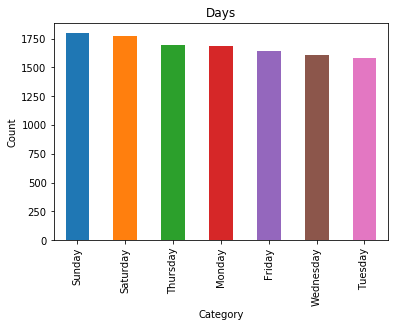

In [36]:
plt.figure()
pd.Series(final_data['day_of_week']).value_counts().plot(kind = 'bar')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Days")

In [37]:
#highly imbalced data -_-

Text(0.5,1,'Days')

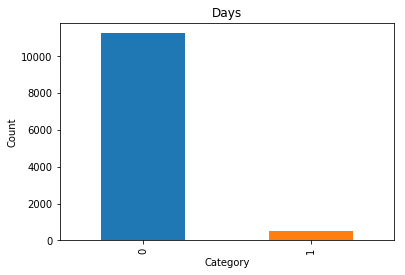

In [38]:
plt.figure()
pd.Series(final_data['criticality']).value_counts().plot(kind = 'bar')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Days")

In [39]:
final_data.to_csv("AVdata.csv")

In [40]:
categorical_variable=final_data.dtypes[final_data.dtypes=="object"].index.values

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le=LabelEncoder()

In [43]:
for var in categorical_variable:
    final_data[var]=le.fit_transform(final_data[var])

In [44]:
##categorical_variabless=test.dtypes[test.dtypes=="object"].index.values

In [45]:
##for var in categorical_variabless:
   ## test[var]=le.fit_transform(test[var])

In [46]:
final_data.corr()

,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality,incident_time_category,day_of_week,1,2
incident_tehsil,1.000000,-0.037732,-0.018019,-0.025858,-0.039480,0.020305,0.005204,-0.027447,0.007360,-0.006433,0.083384,0.057493
cause_of_emergency,-0.037732,1.000000,0.155088,0.152042,0.027072,0.002524,-0.004728,0.074312,-0.096022,-0.021618,0.013362,0.009353
base_to_scene_distance,-0.018019,0.155088,1.000000,0.418133,0.011228,0.005839,0.012373,0.059941,-0.046795,0.007670,0.016156,-0.052821
scene_to_hospital_distance,-0.025858,0.152042,0.418133,1.000000,0.048947,0.023402,-0.019555,0.202170,-0.045377,0.004404,0.017083,0.048433
roadway_feature,-0.039480,0.027072,0.011228,0.048947,1.000000,0.482765,-0.142630,0.028033,-0.028819,0.016801,0.047009,0.393014
road_type,0.020305,0.002524,0.005839,0.023402,0.482765,1.000000,-0.064676,0.002184,-0.013203,0.005178,0.125277,0.208063
surrounding_area,0.005204,-0.004728,0.012373,-0.019555,-0.142630,-0.064676,1.000000,0.016998,0.015928,0.030272,0.170468,-0.326350
criticality,-0.027447,0.074312,0.059941,0.202170,0.028033,0.002184,0.016998,1.000000,-0.017009,-0.000294,0.001721,-0.050583
incident_time_category,0.007360,-0.096022,-0.046795,-0.045377,-0.028819,-0.013203,0.015928,-0.017009,1.000000,-0.003527,-0.003552,-0.014857
day_of_week,-0.006433,-0.021618,0.007670,0.004404,0.016801,0.005178,0.030272,-0.000294,-0.003527,1.000000,0.004738,-0.002321


In [47]:
final_data.head()

,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality,incident_time_category,day_of_week,1,2
0,4,9,13,12,0,0,2,0,5,6,10,3
1,4,0,1,5,0,0,0,0,5,0,10,2
2,4,10,2,2,1,1,4,0,5,2,6,0
3,4,0,8,4,0,0,3,0,3,2,4,3
4,5,0,1,26,0,0,0,0,4,1,5,1


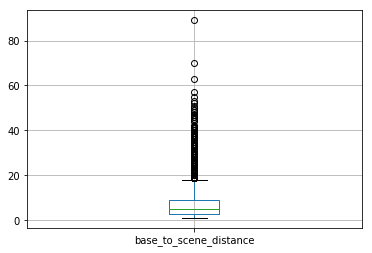

In [48]:
final_data.boxplot("base_to_scene_distance")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f29b80860>]],
      dtype=object)

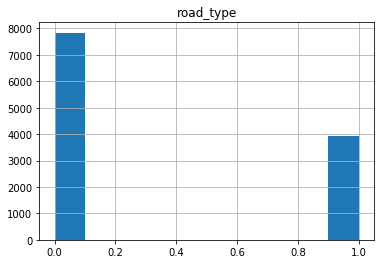

In [49]:
final_data.hist("road_type")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f29bb2358>]],
      dtype=object)

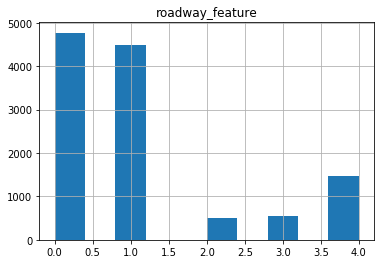

In [50]:
final_data.hist("roadway_feature")

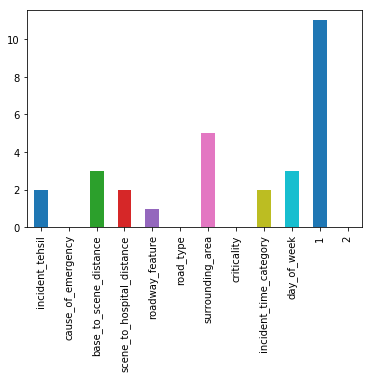

In [51]:
final_data.iloc[30].plot(kind='bar');

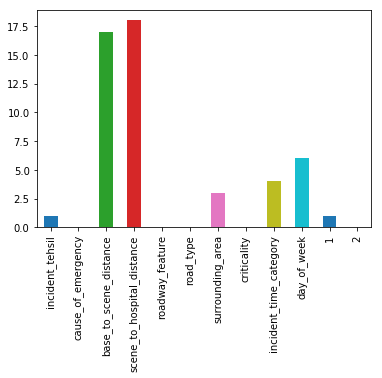

In [52]:
final_data.iloc[5].plot(kind='bar');

In [53]:
dependent_variable="criticality"
independent_variale=[x for x in final_data.columns if x not in ["criticality"]]

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test=train_test_split(final_data[independent_variale],final_data[dependent_variable],test_size=.1)

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
sm = SMOTE(kind='regular')
X_res, y_res = sm.fit_sample(X_train,y_train)

In [58]:
X_res

array([[ 2.        ,  0.        ,  2.        , ...,  4.        ,
        11.        ,  0.        ],
       [ 5.        ,  8.        , 10.        , ...,  2.        ,
         6.        ,  4.        ],
       [ 2.        ,  0.        ,  5.        , ...,  1.        ,
        11.        ,  3.        ],
       ...,
       [ 2.        ,  7.60392684, 14.76732114, ...,  2.53464228,
         0.76732114,  0.        ],
       [ 4.474573  , 12.        , 22.89829201, ...,  1.949146  ,
         1.89829201,  0.        ],
       [ 1.20585919,  3.20585919,  2.79414081, ...,  1.20585919,
         0.61757756,  0.41171837]])

In [59]:
balanced_data=pd.DataFrame(X_res)

In [60]:
balanced_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2.0,0.0,2.0,9.0,1.0,1.0,4.0,5.0,4.0,11.0,0.0
1,5.0,8.0,10.0,0.0,1.0,0.0,5.0,5.0,2.0,6.0,4.0
2,2.0,0.0,5.0,4.0,0.0,0.0,0.0,3.0,1.0,11.0,3.0
3,5.0,4.0,9.0,23.0,4.0,1.0,0.0,3.0,1.0,9.0,5.0
4,2.0,9.0,5.0,3.0,0.0,0.0,0.0,1.0,2.0,9.0,2.0


In [61]:
dependent=pd.DataFrame(y_res)

In [62]:
dependent.head()

,0
0,0
1,0
2,0
3,0
4,0


In [63]:
balanced_data=balanced_data.rename(columns={0:'incident_tehsil', 1:'cause_of_emergency',2:'base_to_scene_distance',3:'scene_to_hospital_distance',4:'roadway_feature',5:'road_type',6:'surrounding_area',7:'incident_time_category',8 :'day_of_week',9 :'1',10:'2'})

In [64]:
features=['incident_tehsil', 'cause_of_emergency','base_to_scene_distance','scene_to_hospital_distance','roadway_feature','road_type','surrounding_area','incident_time_category','day_of_week','1','2']

for var in features:
    balanced_data[var] = balanced_data[var].round()
balanced_data.head()

,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,incident_time_category,day_of_week,1,2
0,2.0,0.0,2.0,9.0,1.0,1.0,4.0,5.0,4.0,11.0,0.0
1,5.0,8.0,10.0,0.0,1.0,0.0,5.0,5.0,2.0,6.0,4.0
2,2.0,0.0,5.0,4.0,0.0,0.0,0.0,3.0,1.0,11.0,3.0
3,5.0,4.0,9.0,23.0,4.0,1.0,0.0,3.0,1.0,9.0,5.0
4,2.0,9.0,5.0,3.0,0.0,0.0,0.0,1.0,2.0,9.0,2.0


In [65]:
dependent=dependent.round()

In [66]:
balanced_data.to_csv("final_data.csv")

In [67]:
dependent.to_csv("target.csv")

In [68]:
dependent[dependent==0].count()

0    10126
dtype: int64

In [69]:
from xgboost import XGBClassifier

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,make_scorer

In [71]:
params=[{'max_depth':[3,4,5,6,7,8,9,10]},{'gamma':[0,1,10,100]}]

In [72]:
model=GridSearchCV(XGBClassifier(), params,cv=5, scoring=make_scorer(roc_auc_score))

In [74]:
prediction_train3=model.predict(X_test)

/home/ashiya/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [75]:
auc_roc3=roc_auc_score(y_test,prediction_train3)
#print( auc_roc3)

In [77]:
del test["incident_location"]
del test["victim_id"]
A=test.incident_time.str.split(':', expand=True)
del A[1]
del A[2]
A.rename(columns={0:'incident_time_category'}, inplace=True)
test1=pd.concat([test,A], axis=1)
itemsB=["00","01","02","03"]
for x in itemsB:
    test1.loc[test1["incident_time_category"]==x,'incident_time_category']="0"
itemsB=["04","05","06","07"]
for x in itemsB:
    test1.loc[test1["incident_time_category"]==x,'incident_time_category']="1"
itemsB=["08","09","10","11"]
for x in itemsB:
    test1.loc[test1["incident_time_category"]==x,'incident_time_category']="2"
itemsB=["12","13","14","15"]
for x in itemsB:
    test1.loc[test1["incident_time_category"]==x,'incident_time_category']="3"
itemsB=["16","17","18","19"]
for x in itemsB:
    test1.loc[test1["incident_time_category"]==x,'incident_time_category']="4"
itemsB=["20","21","22","23"]
for x in itemsB:
    test1.loc[test1["incident_time_category"]==x,'incident_time_category']="5"
test1['incident_date1'] = pd.to_datetime(test1['incident_date'])
test1['day_of_week'] = test1['incident_date1'].dt.weekday_name
B=test1.incident_date.str.split('-', expand=True)
final_test=pd.concat([test1,B] , axis=1)
del final_test["incident_date1"]
del final_test[0]
del final_test["incident_time"]
del final_test["incident_date"]

In [78]:
## RANDOM OVERSAMPLING

In [79]:
from imblearn.over_sampling import RandomOverSampler

In [80]:
ros=RandomOverSampler()

In [81]:
X_resa, y_resa = ros.fit_sample(X_train, y_train)

In [82]:
balanced_dataros=pd.DataFrame(X_resa)

In [83]:
dependentros=pd.DataFrame(y_resa)

In [84]:
balanced_dataros=balanced_dataros.rename(columns={0:'incident_tehsil', 1:'cause_of_emergency',2:'base_to_scene_distance',3:'scene_to_hospital_distance',4:'roadway_feature',5:'road_type',6:'surrounding_area',7:'incident_time_category',8 :'day_of_week',9 :'1',10:'2'})

In [85]:
modelros=GridSearchCV(XGBClassifier(), params,cv=5, scoring=make_scorer(roc_auc_score))

In [87]:
prediction_trainros=modelros.predict(X_test)

/home/ashiya/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [88]:
auc_rocros=roc_auc_score(y_test,prediction_trainros)
#print (auc_rocros)

In [89]:
categorical_variable=final_test.dtypes[final_test.dtypes=="object"].index.values
for var in categorical_variable:
    final_test[var]=le.fit_transform(final_test[var])

In [90]:
pre=model.predict(final_test)

/home/ashiya/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [91]:
prediction=pd.DataFrame(pre)

In [92]:
prediction.to_csv("predict_finale.csv")

In [93]:
balanced_dataros=balanced_dataros.rename(columns={0:'incident_tehsil', 1:'cause_of_emergency',2:'base_to_scene_distance',3:'scene_to_hospital_distance',4:'roadway_feature',5:'road_type',6:'surrounding_area',7:'incident_time_category',8 :'day_of_week',9 :'1',10:'2'})

In [94]:
## Undersampling

In [95]:
from imblearn.under_sampling import RandomUnderSampler


In [96]:
rus=RandomUnderSampler()

In [97]:
X_resu, y_resu = ros.fit_sample(X_train, y_train)

In [98]:
balanced_datarus=pd.DataFrame(X_resu)

In [99]:
dependentrus=pd.DataFrame(y_resu)

In [100]:
balanced_datarus=balanced_datarus.rename(columns={0:'incident_tehsil', 1:'cause_of_emergency',2:'base_to_scene_distance',3:'scene_to_hospital_distance',4:'roadway_feature',5:'road_type',6:'surrounding_area',7:'incident_time_category',8 :'day_of_week',9 :'1',10:'2'})

In [101]:
modelrus=GridSearchCV(XGBClassifier(), params,cv=5, scoring=make_scorer(roc_auc_score))

In [103]:
prediction_trainrus=modelrus.predict(X_test)

/home/ashiya/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [104]:
auc_rocrus=roc_auc_score(y_test,prediction_trainrus)
#print (auc_rocrus)

In [105]:
params=[{'max_depth':[3,4,5,6,7,8,9,10]},{'max_features':['sqrt']}]

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
X_train, X_test, y_train, y_test=train_test_split(final_data[independent_variale],final_data[dependent_variable],test_size=.1)

In [108]:
clf = GridSearchCV(DecisionTreeClassifier(),params, cv=5,
                       scoring=make_scorer(roc_auc_score))

In [109]:
clf.fit(X_train, y_train)
#clf.fit(balanced_datarus, dependentrus)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]}, {'max_features': ['sqrt']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=0)

In [110]:
prediction_train=clf.predict(X_test)

In [111]:
auc_roc=roc_auc_score(y_test,prediction_train)

In [112]:
print (auc_roc)

0.5195136268343815


In [113]:
params=[{'max_depth':[3,4,5,6,7,8,9,10]},{'gamma':[0,1,10,100]}]

In [114]:
model=GridSearchCV(XGBClassifier(), params,cv=5, scoring=make_scorer(roc_auc_score))

In [116]:
prediction_train2=clf.predict(X_test)

In [117]:
auc_roc2=roc_auc_score(y_test,prediction_train)
#print (auc_roc2)